In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
train = pd.read_csv('C:/Users/hananthony1/.vscode/lab_git/vscode/datafile/dacon/basic_stress_prediction/train.csv')
test = pd.read_csv('C:/Users/hananthony1/.vscode/lab_git/vscode/datafile/dacon/basic_stress_prediction/test.csv')
sample_submission = pd.read_csv('C:/Users/hananthony1/.vscode/lab_git/vscode/datafile/dacon/basic_stress_prediction/sample_submission.csv')

train.shape, test.shape, sample_submission.shape

((3000, 18), (3000, 17), (3000, 2))

In [61]:
df_train = train.copy()
df_test = test.copy()

df_train.drop(columns=['ID','family_medical_history','medical_history','mean_working'], inplace=True)
df_test.drop(columns=['ID','family_medical_history','medical_history','mean_working'], inplace=True)

In [62]:
# Create age_group column
# df_train['age_group'] = pd.cut(df_train['age'], bins=range(0,101,10), labels=[f'{i}s' for i in range(0,100,10)])
# df_test['age_group'] = pd.cut(df_test['age'], bins=range(0,101,10), labels=[f'{i}s' for i in range(0,100,10)])

# Convert to category dtype
# df_train['age_group'] = df_train['age_group'].astype('category')
# df_test['age_group'] = df_test['age_group'].astype('category')

In [63]:
cat_col_tr = df_train.select_dtypes(include='object').columns
cat_col_te = df_test.select_dtypes(include='object').columns

In [64]:
df_train[cat_col_tr] = df_train[cat_col_tr].astype('category')
df_test[cat_col_te] = df_test[cat_col_te].astype('category')

# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# for col in cat_col_tr:
#     df_train[col] = le.fit_transform(df_train[col])

# plt.figure(figsize=(12,8))
# sns.heatmap(df_train.corr(), cbar=False,annot=True,)  # No missing values in train set

In [65]:
#missing values filling
for col in []:
    df_train[col] = df_train[col].fillna(df_train[col].median())
    df_test[col] = df_test[col].fillna(df_test[col].median())

df_train = pd.get_dummies(df_train, columns=cat_col_tr, drop_first=True)
df_test = pd.get_dummies(df_test, columns=cat_col_te, drop_first=True)

# Models + Submission


## RandomForest
### baseline


In [23]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MaxAbsScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

pipe = Pipeline(steps=[
    ('scaler', MaxAbsScaler()),
    ('model', RandomForestRegressor(random_state=42))
])

X = df_train.drop(columns=['stress_score'])
y= df_train['stress_score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
print(f'Mean Absolute Error: {mae:.4f}')

Mean Absolute Error: 0.1889


### submission

In [32]:
model.fit(X,y)
y_test = model.predict(df_test)

In [ ]:
sample_submission['stress_score'] = y_test
sample_submission.to_csv('rf_drop_3features.csv', index=False)

## XGBoost
### Baseline


In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

#XGBoost Baseline
X = df_train.drop(columns=['stress_score'])
y = df_train['stress_score']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

model = XGBRegressor(random_state=42,enable_categorical=True)
model.fit(X_train, y_train,eval_set=[(X_train,y_train),(X_val, y_val)],verbose=False)
y_pred = model.predict(X_val)

mae = mean_absolute_error(y_val, y_pred)
print(f'XGBoost Baseline MAE: {mae:.4f}')

XGBoost Baseline MAE: 0.1808


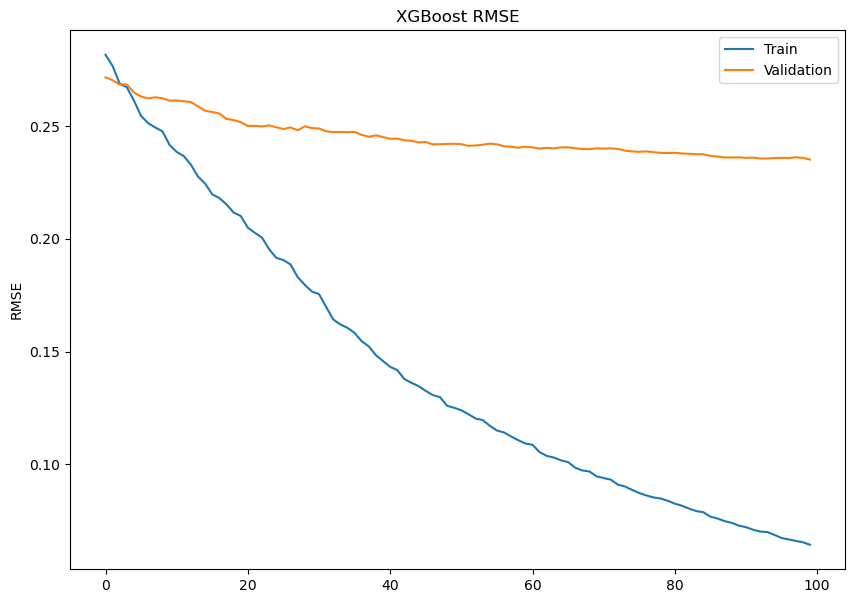

In [71]:
#plot learning curve
results = model.evals_result()
epochs = len(results['validation_0']['rmse'])
x_axis = range(0, epochs)
plt.figure(figsize=(10, 7))
plt.plot(x_axis, results['validation_0']['rmse'], label='Train')
plt.plot(x_axis, results['validation_1']['rmse'], label='Validation')
plt.legend()
plt.ylabel('RMSE')
plt.title('XGBoost RMSE')
plt.show()

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

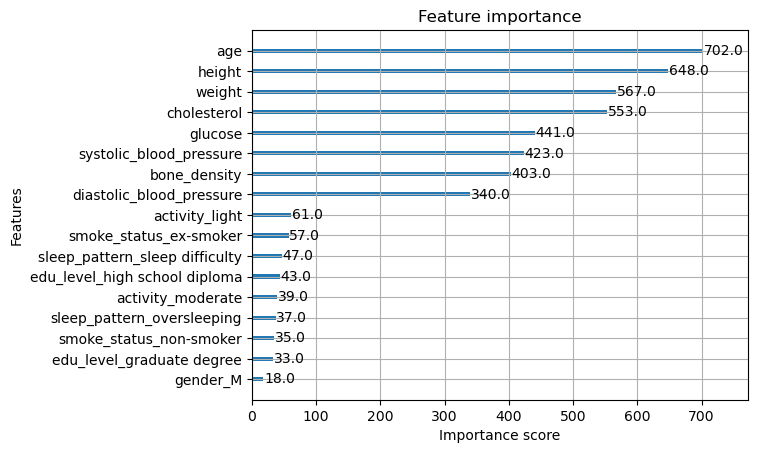

In [72]:
from xgboost import plot_importance
plot_importance(model)

### Submission


In [10]:
model.fit(X,y)
y_test = model.predict(df_test)

In [11]:
sample_submission['stress_score'] = y_test
sample_submission.to_csv('xgboost_drop_1feature.csv', index=False)